https://www.kaggle.com/datasets/sdallman/austin-crime-report-200372021


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 20, "display.max_columns", 60)

In [4]:
def read_file(file_name):
    return pd.read_csv(file_name)
    # для заархивированных файлов
    # df = pd.read_csv(dataset[year], chunksize=chanksize, compression='gzip')

In [5]:
file_name = "Austin.zip"
read_file(file_name)

C:\Users\2emir\AppData\Local\Temp\ipykernel_17808\448488995.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_name)


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347995,20143631822,FAMILY DISTURBANCE,3400,N,12/29/2014 11:41:00 PM,12/29/2014,2341.0,12/29/2014 11:41:00 PM,12/29/2014,2341.0,RESIDENCE / HOME,109 MASTERSON PASS,78753.0,4.0,ED,1,240.0,18.23,N,01/02/2015,NaN,NaN,3130776.0,3130776.0,30.369795,-97.687855,"(30.36979494, -97.68785533)"
2347996,20191270738,THEFT BY SHOPLIFTING,607,N,05/07/2019 10:50:00 AM,05/07/2019,1050.0,05/07/2019 11:31:00 AM,05/07/2019,1131.0,DEPARTMENT / DISCOUNT STORE,11423 N LAMAR BLVD,78753.0,7.0,ED,4,221.0,18.24,NaN,NaN,23C,Theft,3131578.0,3131578.0,30.383630,-97.684932,"(30.38362955, -97.68493154)"
2347997,2008501470,CRIMINAL TRESPASS/TRANSIENT,2721,N,02/19/2008 05:00:00 PM,02/19/2008,1700.0,02/19/2008 05:00:00 PM,02/19/2008,1700.0,PARKING LOTS / GARAGE,6800 BERKMAN DR,78723.0,1.0,ID,5,293.0,21.00,NaN,NaN,NaN,NaN,3130390.0,3130390.0,30.320281,-97.690437,"(30.32028083, -97.6904366)"
2347998,2003921400113,DWI,2100,N,05/20/2003 01:32:00 AM,05/20/2003,132.0,05/20/2003 01:32:00 AM,05/20/2003,132.0,STREETS / HWY / ROAD / ALLEY,4500 N MOPAC EXPY NB,78731.0,10.0,BA,6,325.0,1.00,C,05/22/2003,NaN,NaN,3109748.0,3109748.0,30.320565,-97.755869,"(30.32056515, -97.7558693)"


In [6]:
def get_memory_stat_by_column(df, output_file):
    # вывод пар: колонка - тип данных
    memory_usage_stat = df.memory_usage(deep=True)
    # суммарный размер
    total_memory_usage = memory_usage_stat.sum()
    result = {
        "file_in_memory_size": f"{int(total_memory_usage // 1024):10} KB",
        "columns": []
    }
    # проходимся по колонкам, записываем в список
    for key in df.dtypes.keys():
        result["columns"].append({
            "column_name": key,
            "memory_abs": int(memory_usage_stat[key] // 1024),
            "memory_per": round(memory_usage_stat[key] / total_memory_usage * 100, 4),
            "dtype": str(df.dtypes[key])
        })
    # отсортируем колонки
    result["columns"].sort(key=lambda x: x['memory_abs'], reverse=True)
    # Запись в файл JSON
    with open(output_file, 'w') as file:
        json.dump(result, file)

In [7]:
file_name = "Austin.zip"
dataset = read_file(file_name)
output_file = "результаты_6.json"
get_memory_stat_by_column(dataset, output_file)

C:\Users\2emir\AppData\Local\Temp\ipykernel_17808\448488995.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_name)


In [8]:
# Считает объем памяти до и после преобразований
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # предположим, что если это не дадафрейм, то серия
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем быйты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

In [9]:
# 4. Преобразовать все колонки с типом данных «object» в категориальные, 
#    если количество уникальных значений колонки составляет менее 50%.

In [10]:
def opt_obj(df):
    converted_obj = pd.DataFrame()
    dataset_obj = df.select_dtypes(include=['object']).copy()
    for col in dataset_obj.columns:
        num_unique_values = len(dataset_obj[col].unique())
        num_total_values = len(dataset_obj[col])
        if num_unique_values / num_total_values < 0.5:
            converted_obj.loc[:, col] = dataset_obj[col].astype('category')
        else:
            converted_obj.loc[:, col] = dataset_obj[col]
    print(mem_usage(dataset_obj))
    print(mem_usage(converted_obj))
    return converted_obj    

In [11]:
converted_obj = opt_obj(dataset)

2258.99 MB
463.19 MB


In [12]:
# 5.Провести понижающее преобразование для столбцов типов «int» колонок
def opt_int(df):
    dataset_int = df.select_dtypes(include=['int']) # выбираем колонки типа int
    """
    downcast:
            - 'integer' or 'signed': smallest signed int dtype (min.: np.int8)
            - 'unsigned': smallest unsigned int dtype (min.: np.int8)
            - 'float': smallest float dtype (min.: np.float32)
    """
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    print(mem_usage(dataset_int))
    print(mem_usage(converted_int))
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)
    return converted_int

In [13]:
converted_int = opt_int(dataset)

35.83 MB
22.39 MB
                     before   after
Incident Number       int64  uint64
Highest Offense Code  int64  uint16


In [14]:
# 6. Провести понижающее преобразование для столбцов типов «float» колонок
def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')
    print(mem_usage(dataset_float))
    print(mem_usage(converted_float))
    compare_float = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_float.columns = ['before', 'after']
    compare_float.apply(pd.Series.value_counts)
    print(compare_float)
    return converted_float

In [15]:
converted_float = opt_float(dataset)

161.22 MB
80.61 MB
                   before    after
Occurred Time     float64  float32
Report Time       float64  float32
Zip Code          float64  float32
Council District  float64  float32
Census Tract      float64  float32
X-coordinate      float64  float32
Y-coordinate      float64  float32
Latitude          float64  float32
Longitude         float64  float32


In [16]:
# 7. Повторно провести анализ набора данных, как в п. 2, сравнив показатели занимаемой памяти
# Создаем копию исходного датафрейма
optimized_dataset = dataset.copy()

# заменяем исходные числовые столбцы оптмизированными
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(mem_usage(dataset))
print(mem_usage(optimized_dataset))

2456.04 MB
566.19 MB


In [18]:
# 8. Выбрать произвольно 10 колонок для дальнейшем работы, 
#    прописав преобразование типов и загрузку только нужных данных на этапе чтения файла. 
#    При этом стоит использовать чанки. Сохраните полученный поднабор в отдельном файле.

In [42]:
need_column = dict()
column_names = ['Highest Offense Code',	'APD Sector',	'Report Time',	'Zip Code',	
                'Council District',	'APD District',	'PRA',	'Census Tract','Latitude',	'Longitude']

opt_dtypes = optimized_dataset.dtypes

for key in column_names:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")

with open("dtypes_6.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
# Работа с чанкам
has_header = True
for chunk in pd.read_csv(file_name,
                         usecols=lambda x: x in column_names,
                         dtype=need_column,
                         #parse_dates=['date'],
                         #infer_datetime_format=True,
                         chunksize=100_000):
    # любые преобразования
    print(mem_usage(chunk))
    chunk.to_csv('df_6.csv', mode='a', header=has_header)
    has_header = False

Highest Offense Code:uint16
APD Sector:category
Report Time:float32
Zip Code:float32
Council District:float32
APD District:category
PRA:category
Census Tract:float32
Latitude:float32
Longitude:float32
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
2.96 MB
1.47 MB


In [43]:
# сохраняем информацию о типах, коорые нам нужны. Необходимо для графиков.
def read_types(file_name):
    dtypes = {}
    with open(file_name, mode='r') as file:
        dtypes = json.load(file)
    for key in dtypes.keys():
        if dtypes[key] == 'category':
            dtypes[key] = pd.CategoricalDtype
        else:
            dtypes[key] = np.dtype(dtypes[key])
    return dtypes

need_dtypes = read_types("dtypes_6.json")

dataset = pd.read_csv("df_6.csv",
                  usecols=lambda x: x in need_dtypes.keys(),
                  dtype=need_column)
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348000 entries, 0 to 2347999
Data columns (total 10 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Highest Offense Code  uint16  
 1   Report Time           float32 
 2   Zip Code              float32 
 3   Council District      float32 
 4   APD Sector            category
 5   APD District          category
 6   PRA                   category
 7   Census Tract          float32 
 8   Latitude              float32 
 9   Longitude             float32 
dtypes: category(3), float32(6), uint16(1)
memory usage: 67.3 MB


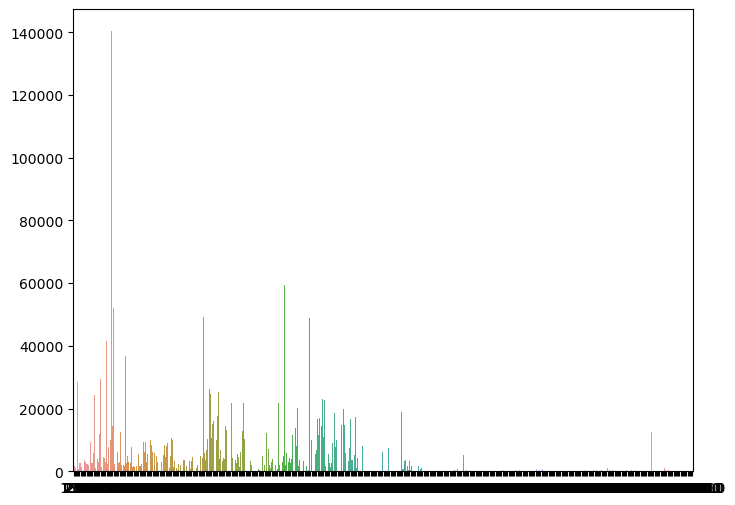

In [44]:
# График столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.countplot(x='Census Tract', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

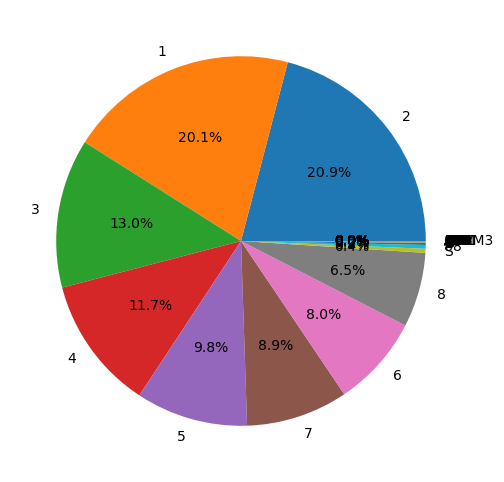

In [73]:
# График круговой диаграммы
plt.figure(figsize=(8, 6))
dataset['APD District'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('')
plt.show()

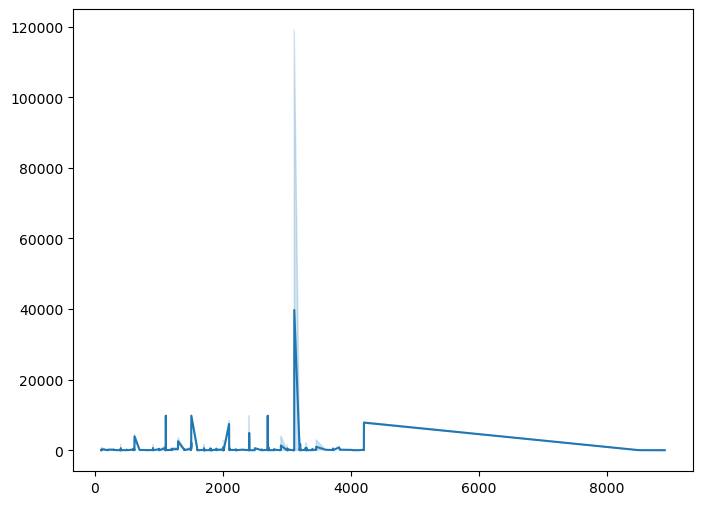

In [48]:
# Линейный график
plt.figure(figsize=(8, 6))
sns.lineplot(x='Highest Offense Code', y='Census Tract', data=dataset)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

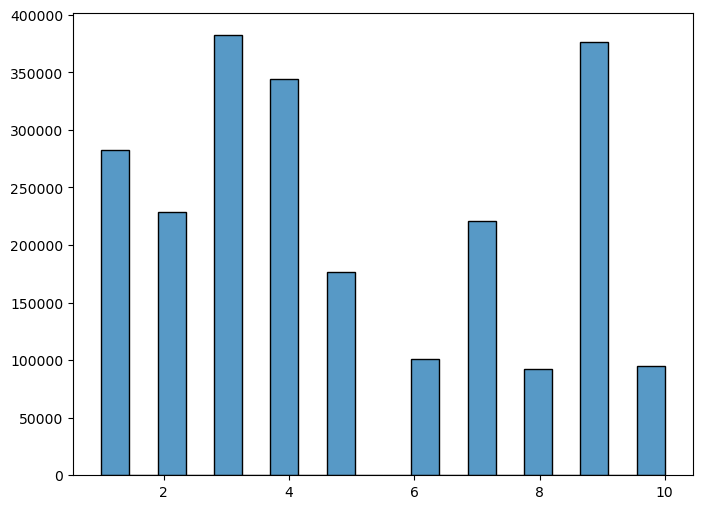

In [66]:
# Гистограмма 
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Council District'], bins=20)
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.show()

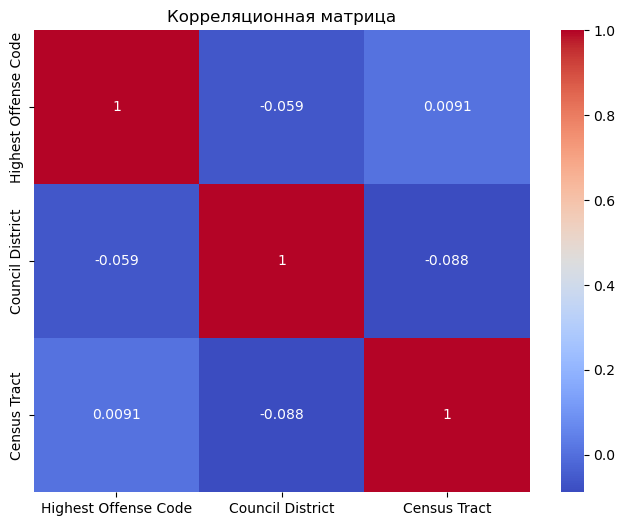

In [75]:
# Корреляционная матрица для связи различных числовых переменных
numerical_vars = ['Highest Offense Code', 'Council District', 'Census Tract']
correlation_matrix = dataset[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()